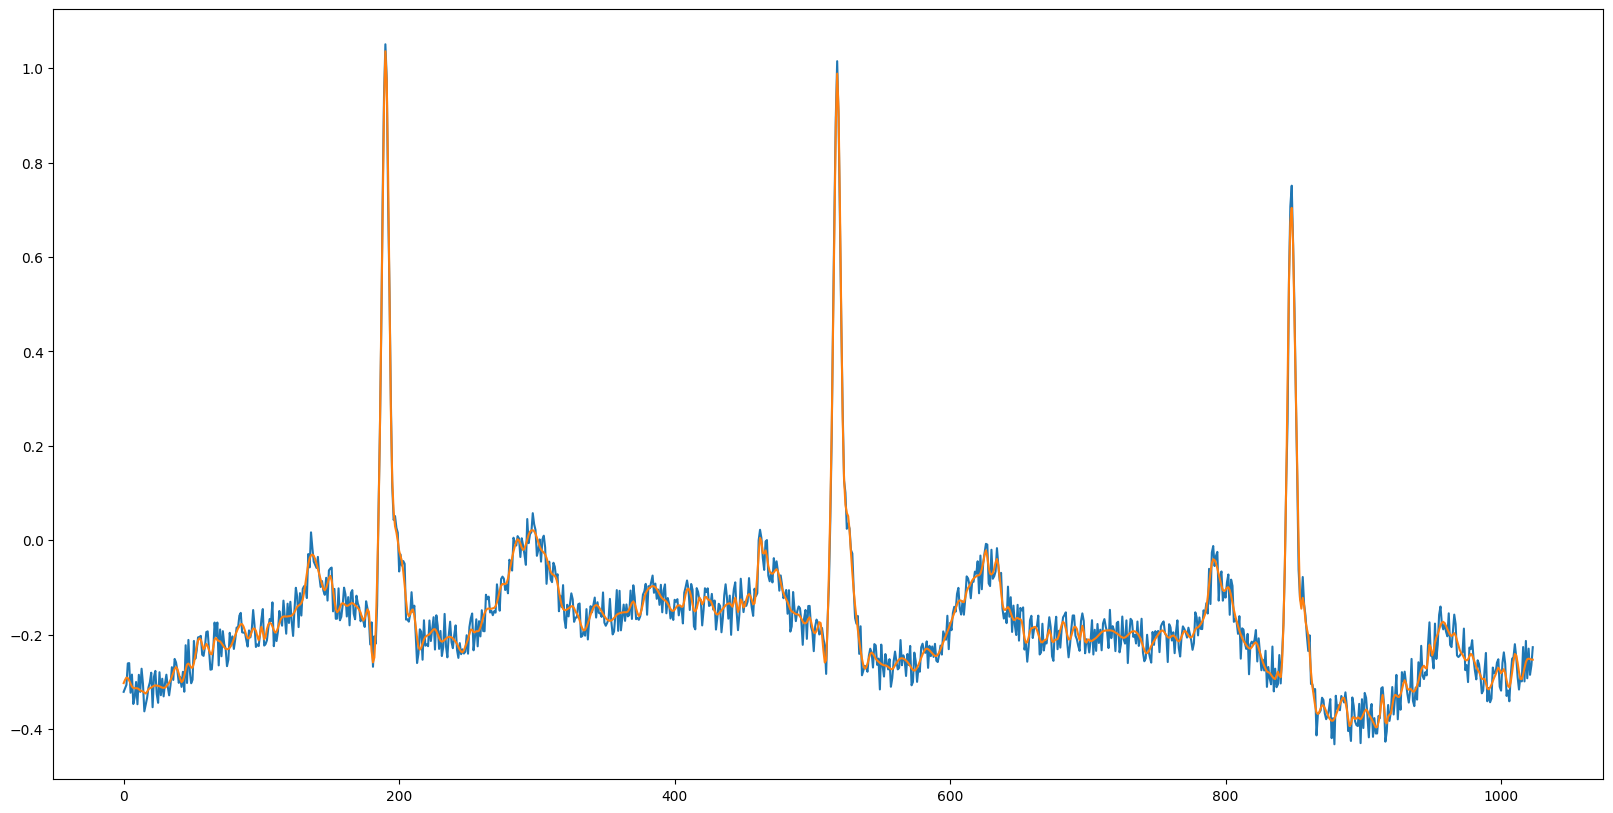

In [17]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt 

x = pywt.data.ecg().astype(float)/256 

sigma = 0.1
x_noisy = x + sigma * np.random.rand(x.size)

x_denoise = denoise_wavelet(x_noisy, method='BayesShrink', mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')
plt.figure(figsize=(20,10), dpi=100)
plt.plot(x_noisy)
plt.plot(x_denoise)

In [9]:
# pip install scikit-image

# Let's Denoise Audio Signal 

🔊 Noisy Audio (Before Denoising):


🔊 Denoised Audio (After Denoising):


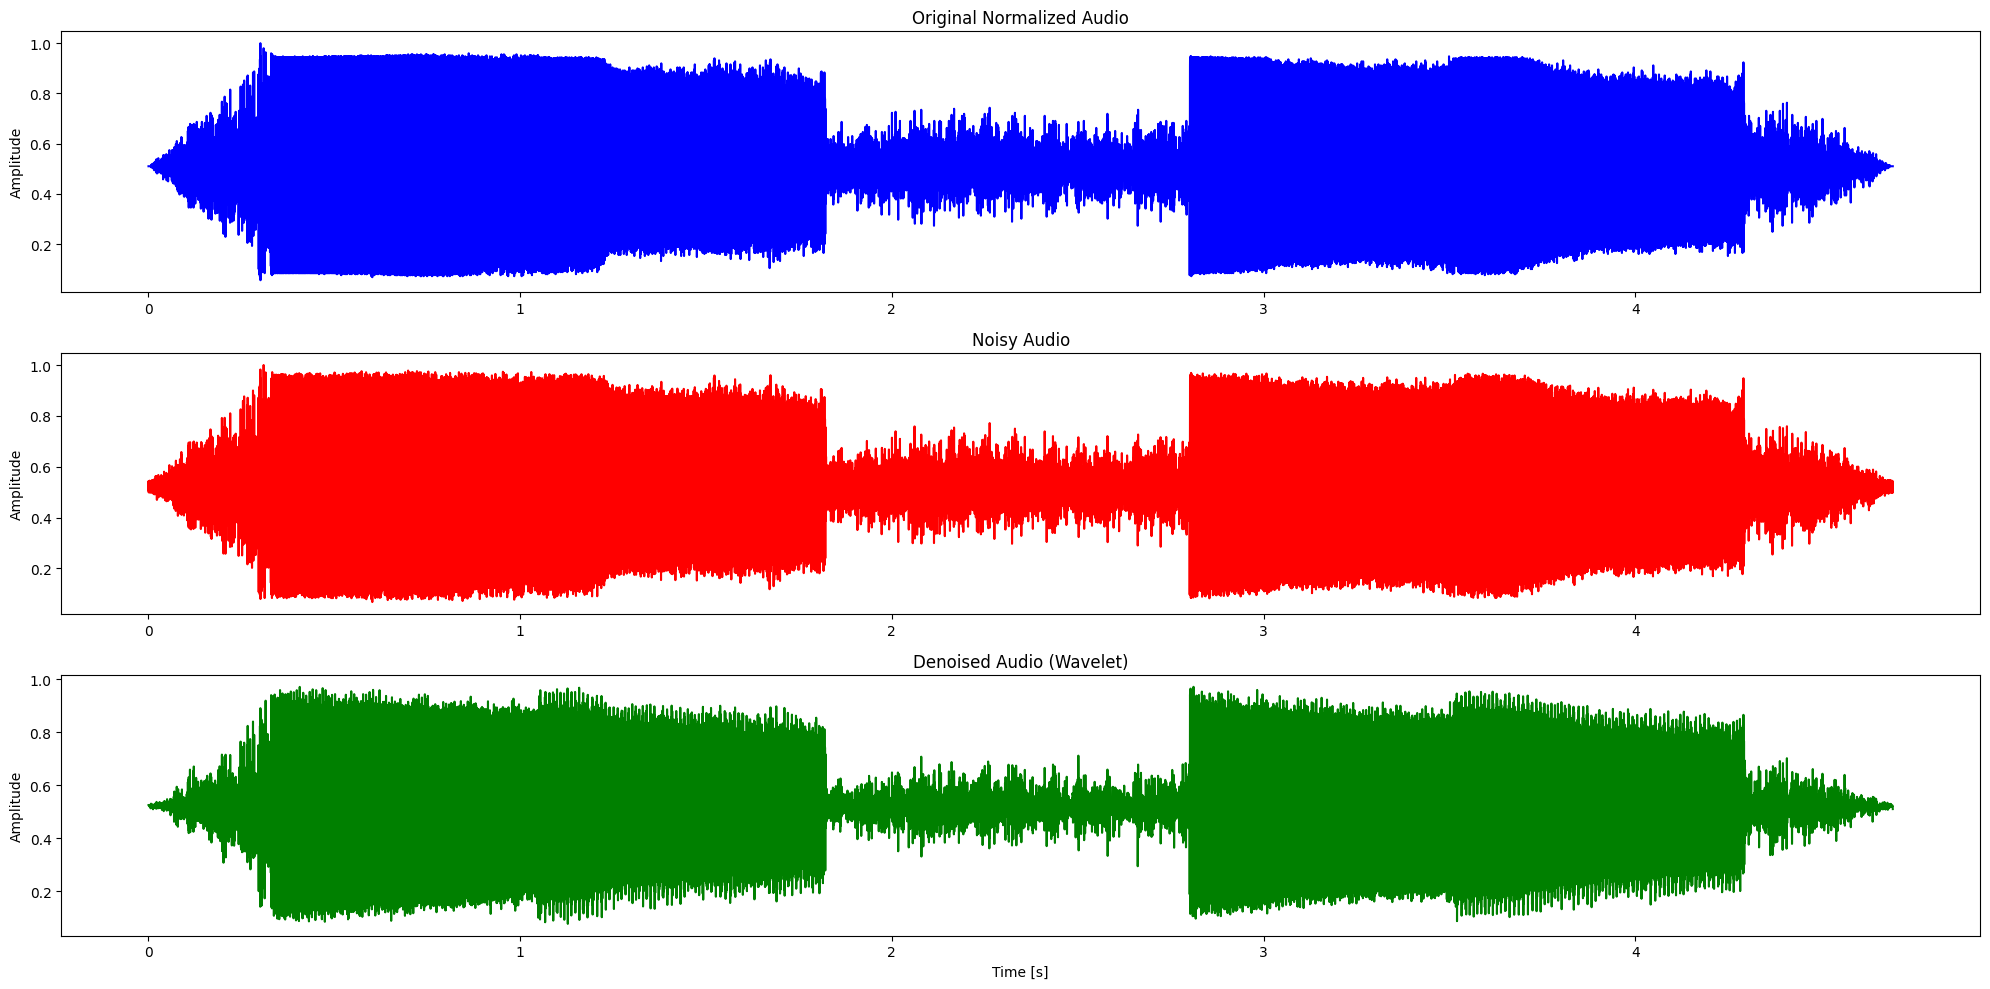

In [18]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt 
from skimage.restoration import denoise_wavelet
import IPython.display as ipd

# 1️⃣ Load audio
Fs, x = wavfile.read('/Users/krushna/Downloads/airplane_chime_x.wav')

# 2️⃣ Convert stereo to mono if needed
if len(x.shape) > 1:
    x = x.mean(axis=1)

# 3️⃣ Normalize
x = x / np.max(np.abs(x))

# 4️⃣ Add synthetic noise
sigma = 0.05
x_noisy = x + sigma * np.random.rand(x.size)
x_noisy /= np.max(np.abs(x_noisy))  # re-normalize to prevent clipping

# 5️⃣ Apply wavelet denoising
x_denoise = denoise_wavelet(
    x_noisy,
    method='VisuShrink',
    mode='soft',
    wavelet_levels=3,
    wavelet='sym8',
    rescale_sigma=True
)

# 6️⃣ Play before and after audio
print("🔊 Noisy Audio (Before Denoising):")
ipd.display(ipd.Audio(x_noisy, rate=Fs))

print("🔊 Denoised Audio (After Denoising):")
ipd.display(ipd.Audio(x_denoise, rate=Fs))

# 7️⃣ Plot waveforms
time = np.linspace(0., len(x)/Fs, len(x))

plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(3, 1, 1)
plt.plot(time, x, color='blue')
plt.title('Original Normalized Audio')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(time, x_noisy, color='red')
plt.title('Noisy Audio')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(time, x_denoise, color='green')
plt.title('Denoised Audio (Wavelet)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
